<a href="https://colab.research.google.com/github/arnaldocavalcanti/eda-sp-bond/blob/main/EDA_SP_BOND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA - DATASET - SP BOND**

**Campos:**

Valor Garantia 
Prazo (em dias)
Custo (Prêmio)

In [99]:
import numpy as np
import pandas as pd
import os

In [102]:
# view directory from uploads colab
import os
!ls
os.getcwd()


dataset_sp_bond_tratado.csv  gdrive  sample_data


'/content'

In [103]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [104]:
!cd gdrive/MyDrive/
!ls gdrive/MyDrive/

 99turns
 All-App-Inventor-Projects.zip
'Aniversariantes '
'Aniversário Veri [CONVITE - Aniversário Veridiana Tomé].gform'
'Aniversário Veri.gsheet'
'App Escola.html'
'APP FESTA.html'
'APP FESTA.png'
'App Oasis.html'
'App Venda AnjoTintas.html'
'Arnaldo Cavalcante'
 ateste.gdoc
'cadastro - analista de requisitos (1).gsheet'
'cadastro - analista de requisitos.gsheet'
 ClassificadosApp.html
'Colab Notebooks'
'Contas janeiro.gsheet'
'Cópia de SaaS Financial Model 3.0.gsheet'
'Copy of IMG_1150.jpg'
'CTE (1).html'
 CTE.html
 dataset_lucas.csv
 DatasetSPBond.csv
'Diagrama SindicoNET.html'
 Dimob.gdoc
 Documentos
'Documento sem título.gdoc'
 FGV-GE-52
 formuladeexcel.gsheet
'Formulário sem título (1).gform'
'Formulário sem título (2).gform'
'Formulário sem título.gform'
'Fotos Eventos'
 FVG-GE52-Marketing
'Google Buzz'
 GrupoADN
 img_flick_8
'Lista de Telefones'
'MBA FGV Gestão Empresarial'
'Pesquisa Agosto 2019.gform'
'Pesquisa de Satisfação.gform'
'Pesquisa de Satisfação (r

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
filename = 'gdrive/MyDrive/dataset_lucas.csv'
#colunas = ['Garantia', 'vigência', 'prêmio']
df = pd.read_csv(filename, sep=';')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Valor Garantia,Prazo de Vig̻ncia,Custo
0,"244839,00",1095,"12353,20"
1,"148221,00",1095,"7201,04"
2,"123180,00",1095,"5995,32"
3,"37116,77",214,"413,47"
4,"634105,35",1143,"31934,77"


In [107]:
df.dtypes

Valor Garantia       object
Prazo de Vig̻ncia     int64
Custo                object
dtype: object

In [108]:
# Ajustando os valores das colunas Valor Garantia e Custo
df['Custo'] = df['Custo'].str.replace(' ', '', regex=False)
df['Custo'] = df['Custo'].str.replace(',','.', regex=False)

df['Valor Garantia'] = df['Valor Garantia'].str.replace(' ', '', regex=False)
df['Valor Garantia'] = df['Valor Garantia'].str.replace(',','.', regex=False)

df.head(10)


,Valor Garantia,Prazo de Vig̻ncia,Custo
0,244839.00,1095,12353.20
1,148221.00,1095,7201.04
2,123180.00,1095,5995.32
3,37116.77,214,413.47
4,634105.35,1143,31934.77
5,70841.67,600,1933.26
6,68730.00,600,1877.54
7,240000.00,730,8168.20
8,1074.00,365,235.00
9,3090.00,60,335.00


In [109]:

df2 = pd.DataFrame(df)
df2['Custo'] = pd.to_numeric(df2['Custo'], errors='coerce', downcast='float')
df2['Valor Garantia'] = pd.to_numeric(df2['Valor Garantia'], errors='coerce', downcast='float')

df2.head()

,Valor Garantia,Prazo de Vig̻ncia,Custo
0,244839.000000,1095,12353.200195
1,148221.000000,1095,7201.040039
2,123180.000000,1095,5995.319824
3,37116.769531,214,413.470001
4,634105.375000,1143,31934.769531


In [110]:
df2.dtypes

Valor Garantia       float32
Prazo de Vig̻ncia      int64
Custo                float32
dtype: object

In [111]:
df2.shape

(9205, 3)

In [112]:
df2.describe

<bound method NDFrame.describe of       Valor Garantia  Prazo de Vig̻ncia         Custo
0      244839.000000               1095  12353.200195
1      148221.000000               1095   7201.040039
2      123180.000000               1095   5995.319824
3       37116.769531                214    413.470001
4      634105.375000               1143  31934.769531
...              ...                ...           ...
9200     2686.000000                 67    273.000000
9201     9979.580078                150    479.559998
9202     3400.419922                293    272.970001
9203   143699.406250                334   1488.969971
9204     2043.810059                 62    273.000000

[9205 rows x 3 columns]>

In [113]:
df2.isnull().sum(axis = 1)


0       0
1       0
2       0
3       0
4       0
       ..
9200    0
9201    0
9202    0
9203    0
9204    0
Length: 9205, dtype: int64

In [114]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [115]:
missing_zero_values_table(df2)

Your selected dataframe has 3 columns and 9205 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [116]:
#Para renomear as colunas caso necessário

df2.rename(columns = {'Prazo de Vig̻ncia':'Prazo'}, inplace = True) 

In [117]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Valor Garantia  9205 non-null   float32
 1   Prazo           9205 non-null   int64  
 2   Custo           9205 non-null   float32
dtypes: float32(2), int64(1)
memory usage: 144.0 KB


In [118]:
df2.describe()


,Valor Garantia,Prazo,Custo
count,9.205000e+03,9205.000000,9205.000000
mean,9.401242e+04,307.632156,1866.147583
std,3.977004e+05,235.551877,7111.007812
min,1.145000e+01,0.000000,128.860001
25%,4.519590e+03,93.000000,278.859985
50%,1.233810e+04,361.000000,422.000000
75%,3.823233e+04,455.000000,1008.530029
max,1.000000e+07,4854.000000,372162.875000


In [119]:
corr = df2.corr()
corr

,Valor Garantia,Prazo,Custo
Valor Garantia,1.000000,0.210604,0.612862
Prazo,0.210604,1.000000,0.329512
Custo,0.612862,0.329512,1.000000


In [120]:
df2.isnull().sum()


Valor Garantia    0
Prazo             0
Custo             0
dtype: int64

In [28]:
df2.to_csv (r'/content/dataset_sp_bond_tratado.csv', index=False)

In [29]:
from google.colab import files
files.download('dataset_sp_bond_tratado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

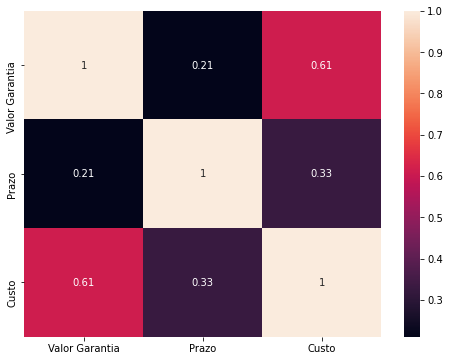

In [121]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


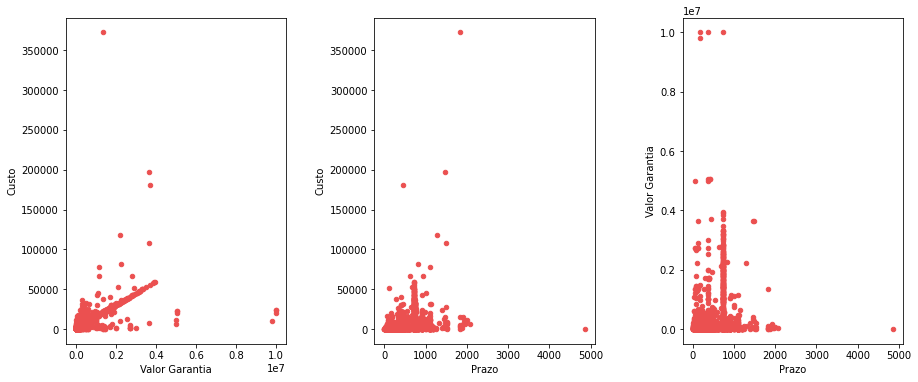

In [122]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df2.plot(kind='scatter', x='Valor Garantia', y='Custo', ax=axes[0])
df2.plot(kind='scatter', x='Prazo', y='Custo', ax=axes[1])
df2.plot(kind='scatter', x='Prazo', y='Valor Garantia', ax=axes[2])

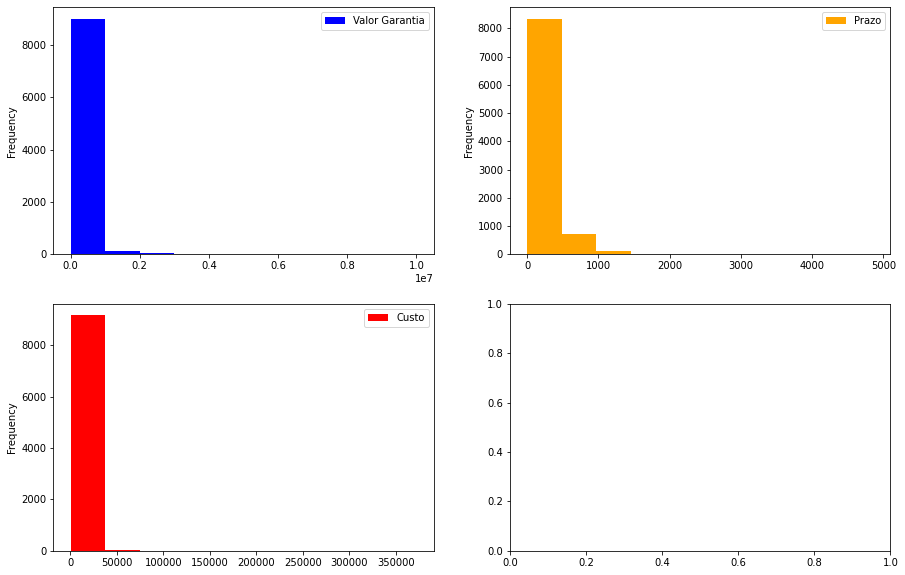

In [123]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

df.plot(kind='hist', y='Valor Garantia', ax=axes[0][0], color = 'blue')
df.plot(kind='hist', y='Prazo', ax=axes[0][1], color = 'orange')
df.plot(kind='hist', y='Custo', ax=axes[1][0], color = 'red')

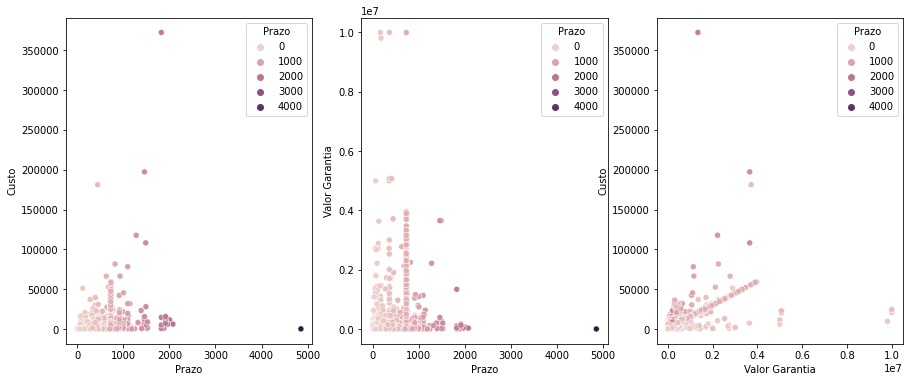

In [124]:
palettes=['#EB5050','#3EA2FF']
sns.set_palette(sns.color_palette(palettes))
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='Prazo', y='Custo', ax=axes[0], data=df2,hue='Prazo')
sns.scatterplot(x='Prazo', y='Valor Garantia', ax=axes[1], data=df2,hue='Prazo')
sns.scatterplot(x='Valor Garantia', y='Custo', ax=axes[2], data=df2,hue='Prazo')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição do Custo')

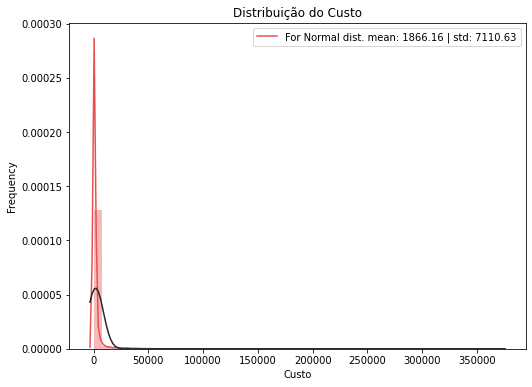

In [125]:
from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df['Custo'], fit=norm)
(mu,sigma)= norm.fit(df['Custo'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribuição do Custo')

In [174]:
df2.shape

(9205, 3)

In [205]:
X = df2.drop(['Custo'], axis = 1)
y = df2
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)

Shape of X:  (9205, 2)
Shape of y:  (9205, 3)


In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train,X_test,y_train,y_test = train_test_split(
    X, 
    y,
    test_size = 0.3, 
    random_state = 42
)


lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.9996900059653185


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [208]:
#df2['index'] = df2.index
results = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_test_pred]})
results

,Actual,Predicted
0,Valor Garantia Prazo Custo 248 ...,"[[8818.400390625091, 366.0, 1200.9234181460963..."


In [213]:
#X_train.head()
X_train_registro = X_train.iloc[-2:]
X_train_registro.shape


(2, 2)

In [214]:
X_train_registro.head

<bound method NDFrame.head of       Valor Garantia  Prazo
860          20000.0     90
7270       2815176.0    731>

In [211]:
# Normalize the data registro unico para testar o modelo
###
###

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_registro = sc.fit_transform(X_train_registro)


In [218]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [216]:
pd.DataFrame(X_train_registro).head()

,Valor Garantia,Prazo
860,20000.0,90
7270,2815176.0,731


In [219]:
pd.DataFrame(y_train).head()

,Valor Garantia,Prazo,Custo
8448,5.550000e+04,213,423.880005
4233,2.663482e+04,210,578.169983
6337,1.171646e+06,730,18746.330078
7852,1.809590e+03,182,290.000000
3080,9.292410e+03,457,390.000000


In [220]:
def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    accuracy_model_train = r2_score(y_train, y_pred_model_train)
    print("Training Accuracy: ", accuracy_model_train)
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing Accuracy: ", accuracy_model_test)
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)
#     if model == polynomial_reg:
#         polynomial_features = PolynomialFeatures(degree=3)
#         y_pred_cv_PR = cross_val_predict(model, polynomial_features.fit_transform(X), y, cv=20)
#     else:
    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

In [221]:
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score, mean_squared_error  

In [222]:
from sklearn.linear_model import LinearRegression  

multiple_linear_reg = LinearRegression(fit_intercept=False)  
multiple_linear_reg.fit(X_train, y_train)  
model_summary(multiple_linear_reg, "Multiple_linear_Regression")

Multiple_linear_Regression
Training Accuracy:  0.24372809539231377
Testing Accuracy:  0.08971228465533769
RMSE for Training Data:  53713.83311021734
RMSE for Testing Data:  53838.00747551873
Accuracy for 20 - Fold Cross Predicted:  0.7993026044620012


In [223]:
y_train.shape

(6443, 3)

In [232]:
Y_pred = multiple_linear_reg.predict(X_train_registro)
print(Y_pred)

[[7.65623540e+09 2.15827790e+04 8.43818883e+07]
 [1.07768251e+12 1.75300127e+05 1.18629417e+10]]


In [224]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  
x_train_poly = polynomial_features.fit_transform(X_train)  
x_test_poly = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train)  
print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy: ", accuracy_PR_train)
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy: ", accuracy_PR_test)
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=20)
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)

PolynomialFeatures
Training Accuracy:  0.936765551008456
Testing Accuracy:  0.8537570968969734
RMSE for Training Data:  1571.2937715086518
RMSE for Testing Data:  3364.859613622507
Accuracy for 20-Fold Cross Predicted:  -2.6297565016221367


In [227]:
pd.DataFrame(X_train_registro).head()

,Valor Garantia,Prazo
860,20000.0,90
7270,2815176.0,731


In [228]:
X_train_registro.shape

(2, 2)

In [52]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(X_train, y_train) 
model_summary(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression
Training Accuracy:  0.5986080409469617
Testing Accuracy:  0.47071020777768896
RMSE for Training Data:  8620.253431465353
RMSE for Testing Data:  11078.310754673133
Accuracy for 20 - Fold Cross Predicted:  0.5201237136938136


[Text(299.0974576271186, 498.3, 'X[0] <= 2.731\nmse = 48861317749.644\nsamples = 6443\nvalue = [[92921.314]\n[309.947]\n[1841.711]]'),
 Text(151.32203389830508, 407.70000000000005, 'X[0] <= 0.441\nmse = 4000241638.232\nsamples = 6303\nvalue = [[45562.648]\n[303.001]\n[1205.247]]'),
 Text(75.66101694915254, 317.1, 'X[0] <= -0.041\nmse = 582924074.19\nsamples = 6058\nvalue = [[27230.588]\n[294.449]\n[896.771]]'),
 Text(37.83050847457627, 226.5, 'X[0] <= -0.17\nmse = 98448459.514\nsamples = 5496\nvalue = [[15869.415]\n[288.174]\n[639.918]]'),
 Text(18.915254237288135, 135.89999999999998, 'X[0] <= -0.213\nmse = 16265081.558\nsamples = 4462\nvalue = [[8727.423]\n[280.581]\n[459.431]]'),
 Text(9.457627118644067, 45.299999999999955, 'mse = 3167003.214\nsamples = 3112\nvalue = [[4773.414]\n[273.1]\n[365.148]]'),
 Text(28.3728813559322, 45.299999999999955, 'mse = 6729902.758\nsamples = 1350\nvalue = [[17842.146]\n[297.824]\n[676.771]]'),
 Text(56.7457627118644, 135.89999999999998, 'X[0] <= -0.1

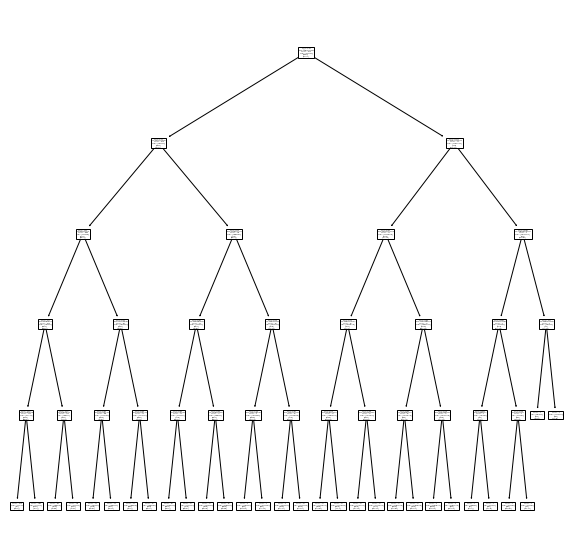

In [53]:
import sklearn
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
sklearn.tree.plot_tree(decision_tree_reg)

In [54]:
from sklearn.ensemble import RandomForestRegressor  

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
random_forest_reg.fit(X_train, y_train) 
model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Training Accuracy:  0.6045407378859848
Testing Accuracy:  0.4726021952775588
RMSE for Training Data:  10200.126733344348
RMSE for Testing Data:  16497.465921902032
Accuracy for 20 - Fold Cross Predicted:  0.5293906952325584
